Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.87      0.93        30

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



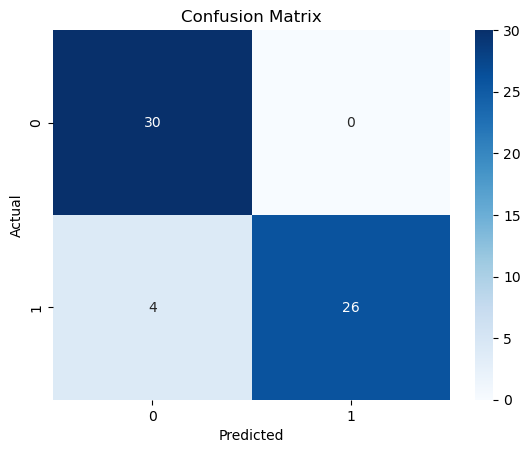

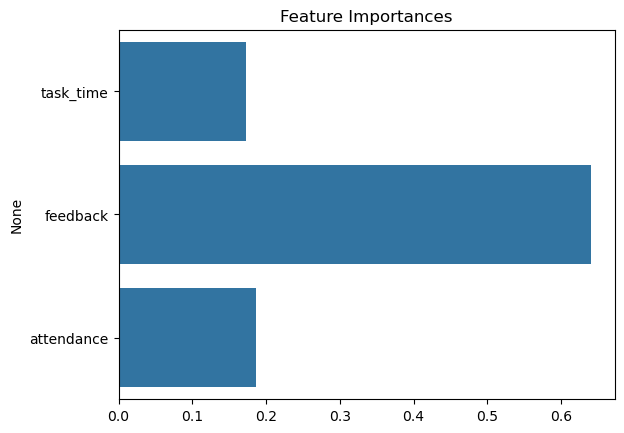


New predictions (1=Excel, 0=Struggle): [1 0]


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("intern_data.csv")

# Features and target
X = df[["task_time", "feedback", "attendance"]]
y = df["outcome"]

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix")
plt.show()

# Feature importance
importances = rf.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances")
plt.show()

# Predict new interns
new_data = pd.DataFrame({
    "task_time": [45, 60],
    "feedback": [5, 2],
    "attendance": [0.95, 0.80]
})
print("\nNew predictions (1=Excel, 0=Struggle):", rf.predict(new_data))
